#	The VC Inequality

#Shattering

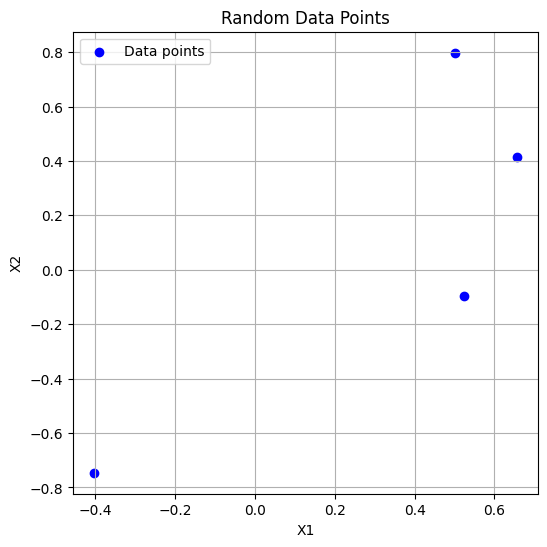

The hypothesis class cannot shatter the set of points.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_points):
    """ Generate random data points for demonstration """
    X = np.random.uniform(-1, 1, size=(num_points, 2))
    return X

def plot_dataset(X):
    """ Plot dataset """
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], color='b', marker='o', label='Data points')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Random Data Points')
    plt.legend()
    plt.grid(True)
    plt.show()

def shatter_points(X, hypothesis):
    """ Check if hypothesis class can shatter given set of points X """
    # Evaluate hypothesis on each data point
    y_pred = hypothesis(X)
    # Check if all possible labelings can be achieved
    return len(np.unique(y_pred)) == 2**len(X)

def example_hypothesis(X):
    """ Example hypothesis function for demonstration """
    return (X[:, 0] > 0) & (X[:, 1] > 0)

# Generate and plot random data points
num_points = 4
data_points = generate_data(num_points)
plot_dataset(data_points)

# Example hypothesis function
can_shatter = shatter_points(data_points, example_hypothesis)

if can_shatter:
    print("The hypothesis class can shatter the set of points.")
else:
    print("The hypothesis class cannot shatter the set of points.")

#The VC inequality

In [ ]:
import numpy as np

def vc_inequality_bound(N, d_vc, delta):
    """ Compute the VC inequality bound for a classifier.

    Args:
        N (int): Number of training examples.
        d_vc (int): VC dimension of the hypothesis class.
        delta (float): Confidence level (e.g., delta = 0.05 for 95% confidence).

    Returns:
        float: VC inequality bound (generalization error bound).
    """
    epsilon = np.sqrt((8 / N) * np.log(4 * ((2 * N) ** d_vc + 1) / delta))
    return epsilon

# Example usage
N = 1000  # Number of training examples
d_vc = 10  # VC dimension of the hypothesis class
delta = 0.05  # Confidence level

# Compute VC inequality bound
generalization_error_bound = vc_inequality_bound(N, d_vc, delta)

print(f"VC Inequality Bound (Generalization Error Bound): {generalization_error_bound:.4f}")

VC Inequality Bound (Generalization Error Bound): 0.8020


In [ ]:
import numpy as np

def vc_inequality_bound(N, d_vc, delta):
    """ Compute the VC inequality bound for a classifier.

    Args:
        N (int): Number of training examples.
        d_vc (int): VC dimension of the hypothesis class.
        delta (float): Confidence level (e.g., delta = 0.05 for 95% confidence).

    Returns:
        float: VC inequality bound (generalization error bound).
    """
    epsilon_vc = np.sqrt((8 / N) * np.log(4 * ((2 * N) ** d_vc + 1) / delta))
    return epsilon_vc

def symmetrized_rademacher_complexity(X, hypothesis):
    """ Compute the symmetrized Rademacher complexity for a hypothesis class.

    Args:
        X (numpy.ndarray): Input data points (shape: [N, d]).
        hypothesis (function): Hypothesis function that takes X as input.

    Returns:
        float: Symmetrized Rademacher complexity.
    """
    N, d = X.shape
    sigma = np.random.choice([-1, 1], size=N)
    rademacher_terms = sigma * hypothesis(X)
    rademacher_complexity = (1 / N) * np.abs(rademacher_terms).sum()
    return rademacher_complexity

def sauer_shelah_lemma(d_vc, N):
    """ Compute the upper bound on the growth function using Sauer-Shelah lemma.

    Args:
        d_vc (int): VC dimension of the hypothesis class.
        N (int): Number of points.

    Returns:
        int: Upper bound on the growth function.
    """
    if N <= d_vc:
        return 2 ** N
    else:
        return sum([np.math.comb(N, i) for i in range(d_vc + 1)])

# Example usage
N = 1000  # Number of training examples
d_vc = 10  # VC dimension of the hypothesis class
delta = 0.05  # Confidence level

# Compute VC inequality bound
epsilon_vc = vc_inequality_bound(N, d_vc, delta)

# Generate random data points
X = np.random.uniform(-1, 1, size=(N, 2))

# Example hypothesis function (e.g., linear threshold function)
def example_hypothesis(X):
    return (X[:, 0] > 0).astype(int)

# Compute symmetrized Rademacher complexity
rademacher_complexity = symmetrized_rademacher_complexity(X, example_hypothesis)

# Compute upper bound on the growth function using Sauer-Shelah lemma
growth_function_bound = sauer_shelah_lemma(d_vc, N)

print(f"VC Inequality Bound (Generalization Error Bound): {epsilon_vc:.4f}")
print(f"Symmetrized Rademacher Complexity: {rademacher_complexity:.4f}")
print(f"Upper Bound on Growth Function: {growth_function_bound}")

VC Inequality Bound (Generalization Error Bound): 0.8020
Symmetrized Rademacher Complexity: 0.4730
Upper Bound on Growth Function: 266091888964068747054476


<ipython-input-17-7a9d5c1695d2>:46: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return sum([np.math.comb(N, i) for i in range(d_vc + 1)])


<ipython-input-18-17eef446e3d8>:17: RuntimeWarning: overflow encountered in scalar multiply
  epsilon_vc = np.sqrt((8 / N) * np.log(4 * ((2 * N) ** d_vc + 1) / delta))
<ipython-input-18-17eef446e3d8>:17: RuntimeWarning: invalid value encountered in log
  epsilon_vc = np.sqrt((8 / N) * np.log(4 * ((2 * N) ** d_vc + 1) / delta))
<ipython-input-18-17eef446e3d8>:52: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  growth_bound = sum([np.math.comb(N, i) for i in range(d_vc + 1)])


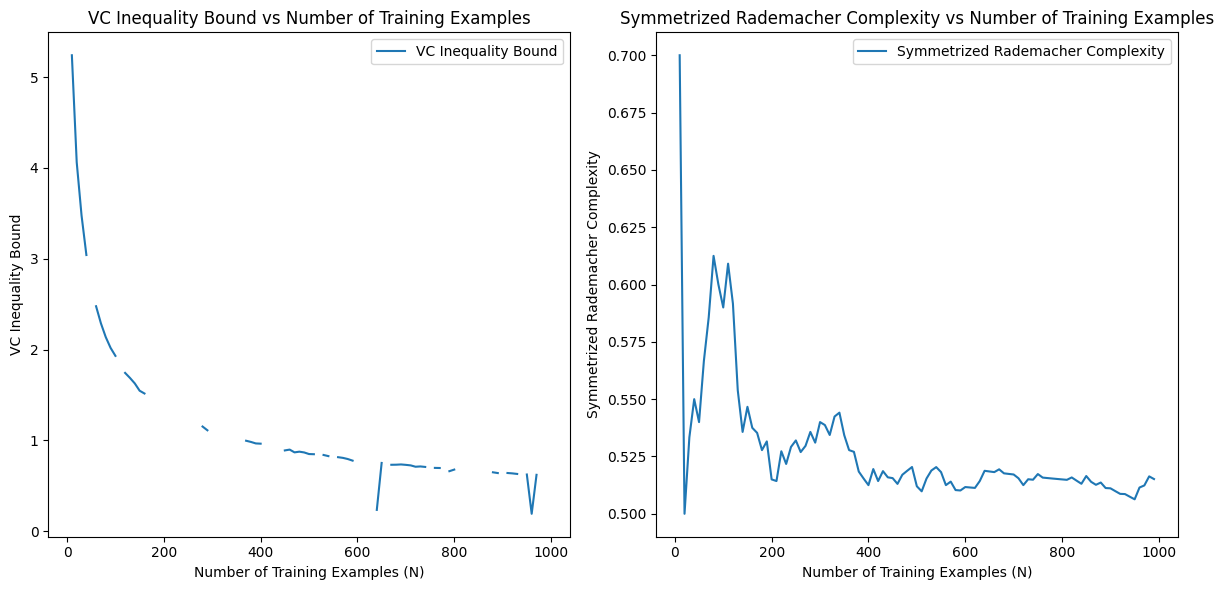

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def vc_inequality_bound(N_values, d_vc, delta):
    """ Compute the VC inequality bound for a range of N values.

    Args:
        N_values (list): List of numbers of training examples.
        d_vc (int): VC dimension of the hypothesis class.
        delta (float): Confidence level (e.g., delta = 0.05 for 95% confidence).

    Returns:
        list: List of VC inequality bounds (generalization error bounds) for each N.
    """
    bounds = []
    for N in N_values:
        epsilon_vc = np.sqrt((8 / N) * np.log(4 * ((2 * N) ** d_vc + 1) / delta))
        bounds.append(epsilon_vc)
    return bounds

def symmetrized_rademacher_complexity(X, hypothesis):
    """ Compute the symmetrized Rademacher complexity for a hypothesis class.

    Args:
        X (numpy.ndarray): Input data points (shape: [N, d]).
        hypothesis (function): Hypothesis function that takes X as input.

    Returns:
        float: Symmetrized Rademacher complexity.
    """
    N, d = X.shape
    sigma = np.random.choice([-1, 1], size=N)
    rademacher_terms = sigma * hypothesis(X)
    rademacher_complexity = (1 / N) * np.abs(rademacher_terms).sum()
    return rademacher_complexity

def sauer_shelah_lemma(d_vc, N_values):
    """ Compute the upper bound on the growth function using Sauer-Shelah lemma.

    Args:
        d_vc (int): VC dimension of the hypothesis class.
        N_values (list): List of numbers of points.

    Returns:
        list: List of upper bounds on the growth function for each N.
    """
    bounds = []
    for N in N_values:
        if N <= d_vc:
            growth_bound = 2 ** N
        else:
            growth_bound = sum([np.math.comb(N, i) for i in range(d_vc + 1)])
        bounds.append(growth_bound)
    return bounds

# Example usage
N_values = np.arange(10, 1000, 10)  # Range of numbers of training examples
d_vc = 10  # VC dimension of the hypothesis class
delta = 0.05  # Confidence level

# Compute VC inequality bounds for the range of N values
epsilon_vc_values = vc_inequality_bound(N_values, d_vc, delta)

# Generate random data points for Rademacher complexity computation
X = np.random.uniform(-1, 1, size=(max(N_values), 2))

# Compute symmetrized Rademacher complexity for each N in N_values
rademacher_complexity_values = [symmetrized_rademacher_complexity(X[:N], example_hypothesis) for N in N_values]

# Compute upper bounds on the growth function using Sauer-Shelah lemma for the range of N values
growth_function_bounds = sauer_shelah_lemma(d_vc, N_values)

# Plotting
plt.figure(figsize=(12, 6))

# Plot VC Inequality Bound vs N
plt.subplot(1, 2, 1)
plt.plot(N_values, epsilon_vc_values, label='VC Inequality Bound')
plt.xlabel('Number of Training Examples (N)')
plt.ylabel('VC Inequality Bound')
plt.title('VC Inequality Bound vs Number of Training Examples')
plt.legend()

# Plot Symmetrized Rademacher Complexity vs N
plt.subplot(1, 2, 2)
plt.plot(N_values, rademacher_complexity_values, label='Symmetrized Rademacher Complexity')
plt.xlabel('Number of Training Examples (N)')
plt.ylabel('Symmetrized Rademacher Complexity')
plt.title('Symmetrized Rademacher Complexity vs Number of Training Examples')
plt.legend()

plt.tight_layout()
plt.show()

#Application to ERM

Training Accuracy: 0.9038
Test Accuracy: 0.9000
VC Inequality Bound (Generalization Error Bound): 0.5149


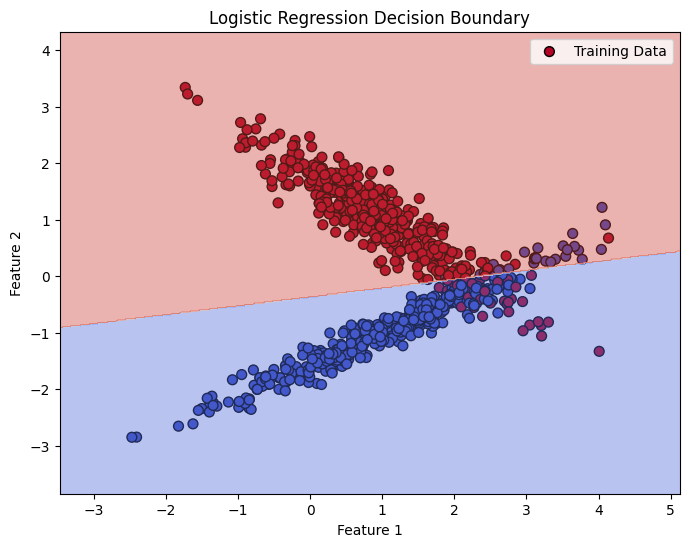

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def vc_inequality_bound(N, d_vc, delta):
    """ Compute the VC inequality bound for a classifier.

    Args:
        N (int): Number of training examples.
        d_vc (int): VC dimension of the hypothesis class.
        delta (float): Confidence level (e.g., delta = 0.05 for 95% confidence).

    Returns:
        float: VC inequality bound (generalization error bound).
    """
    epsilon_vc = np.sqrt((8 / N) * np.log(4 * ((2 * N) ** d_vc + 1) / delta))
    return epsilon_vc

# Generate synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model (ERM) to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model on training and test sets
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

# Calculate VC inequality bound for the model
N_train = len(X_train)
d_vc = 3  # Assuming VC dimension (for example)
delta = 0.05  # Confidence level (e.g., 95% confidence)

vc_bound = vc_inequality_bound(N_train, d_vc, delta)

# Print results
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"VC Inequality Bound (Generalization Error Bound): {vc_bound:.4f}")

# Plot decision boundary (if applicable)
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50, label='Training Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()